TWO-WAY MIXED MODEL ANOVA ANALYSIS
Cholesterol Levels: Margarine Brand × Time

1. DATA OVERVIEW
--------------------------------------------------------------------------------
   ID  Before  After4weeks  After8weeks Margarine
0   1    6.42         5.83         5.75         B
1   2    6.76         6.20         6.13         B
2   3    6.56         5.83         5.71         B
3   4    4.80         4.27         4.15         A
4   5    8.43         7.71         7.67         B
5   6    7.49         7.12         7.05         A
6   7    8.05         7.25         7.10         B
7   8    5.05         4.63         4.67         A
8   9    5.77         5.31         5.33         B
9  10    3.91         3.70         3.66         A

Dataset shape: (18, 5)
Columns: ['ID', 'Before', 'After4weeks', 'After8weeks', 'Margarine']

2. ASSUMPTION CHECKING
--------------------------------------------------------------------------------

Plot for Outlier Detection


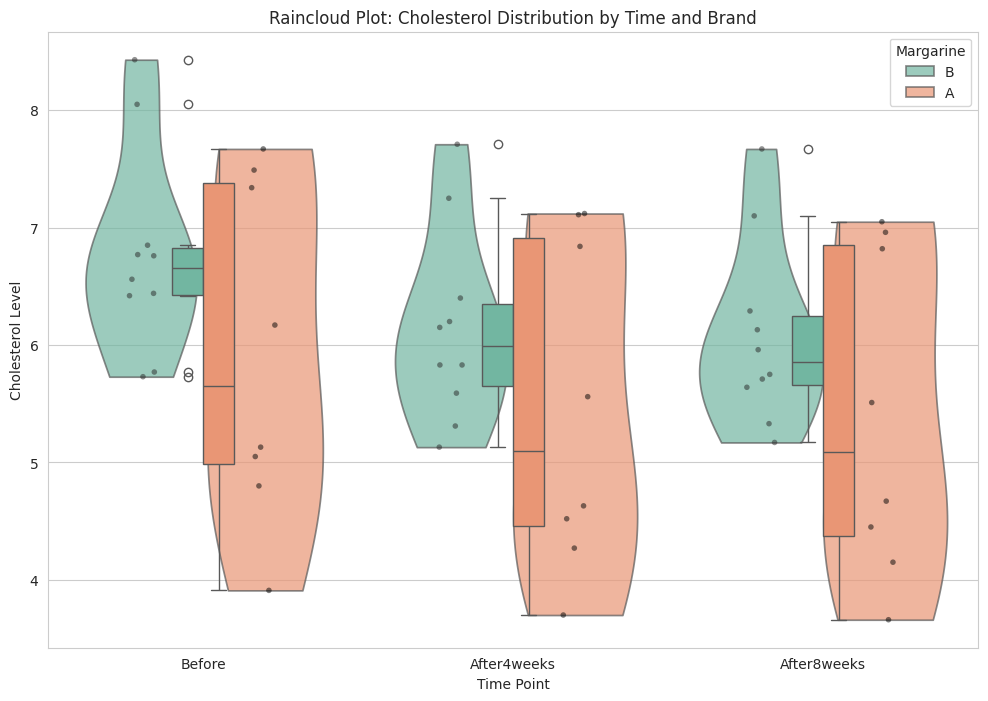

DESCRIPTIVE STATISTICS & NORMALITY
--------------------------------------------------------------------------------
                       Valid N   Mean  Std Dev  Skewness  \
Margarine Time                                             
A         After4weeks        8  5.469    1.388     0.200   
          After8weeks        8  5.409    1.374     0.172   
          Before             8  5.945    1.428     0.024   
B         After4weeks       10  6.140    0.815     0.881   
          After8weeks       10  6.075    0.779     1.124   
          Before            10  6.778    0.866     0.917   

                       Std. Error of Skewness  Kurtosis  \
Margarine Time                                            
A         After4weeks                   0.752    -1.998   
          After8weeks                   0.752    -2.010   
          Before                        0.752    -1.744   
B         After4weeks                   0.687     0.233   
          After8weeks                   0.687    

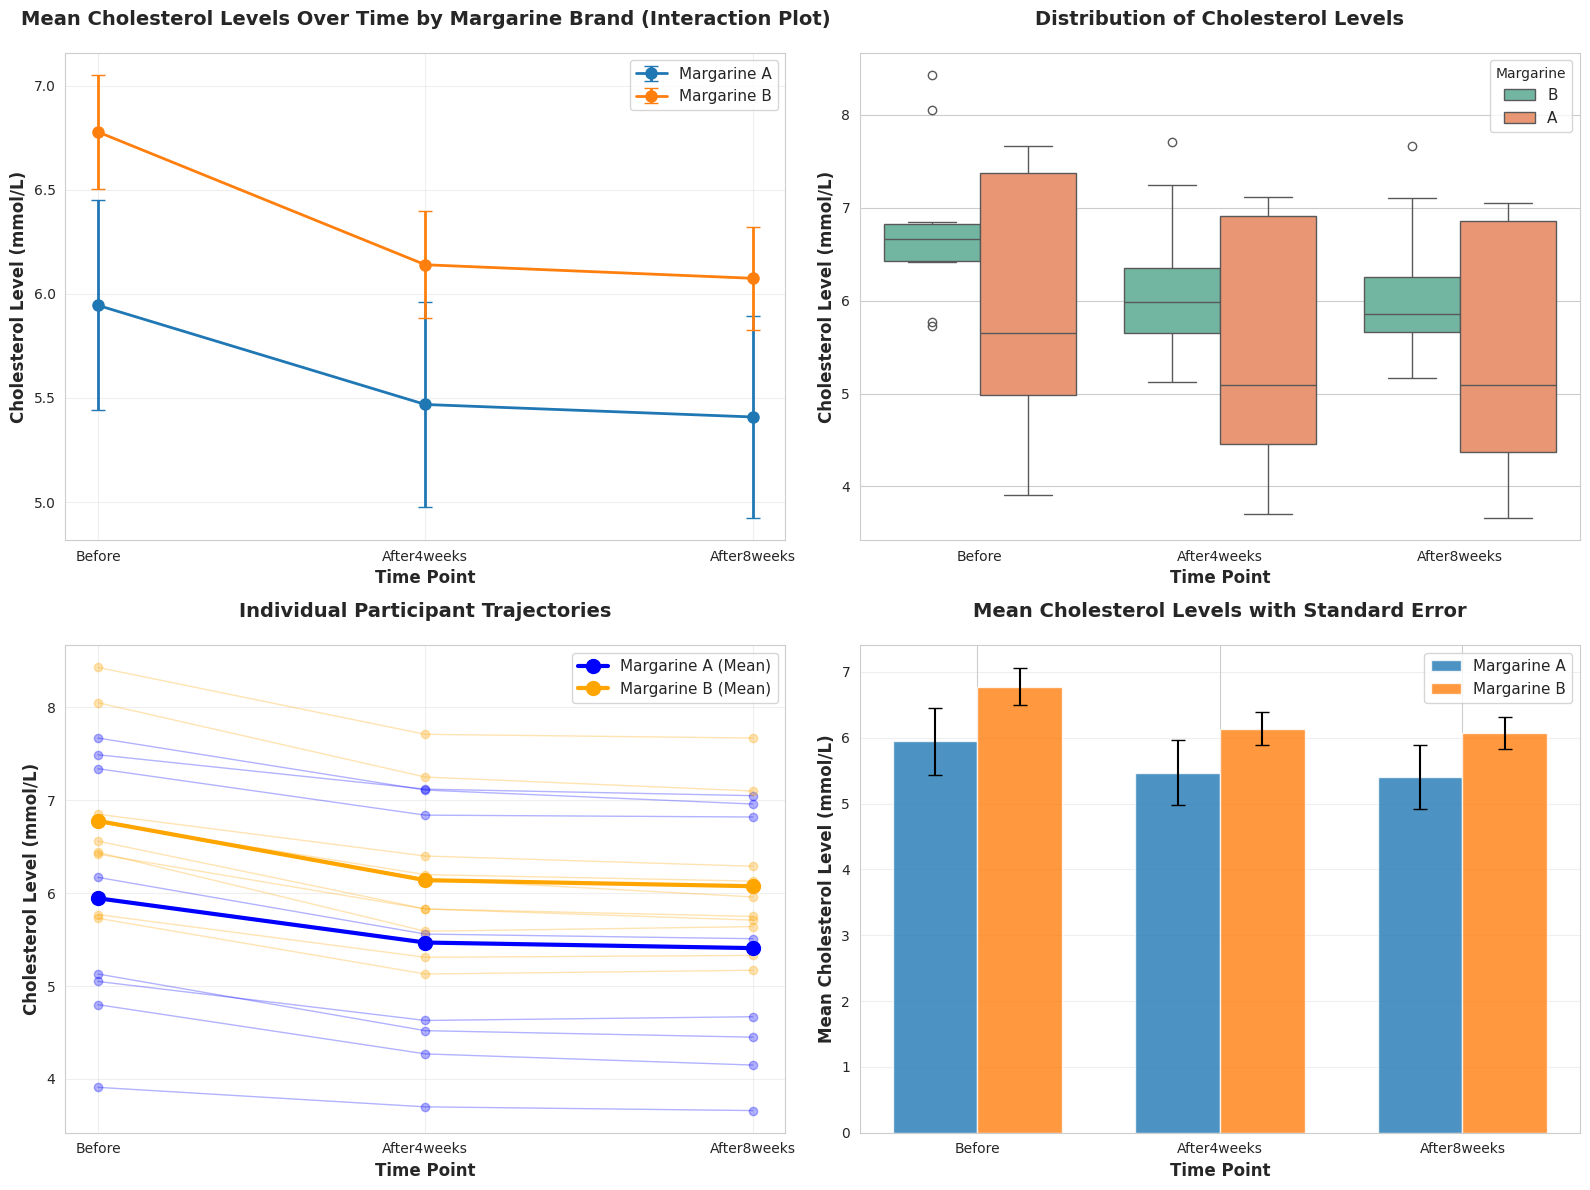


7. APA STYLE REPORTING

--- ANOVA Summary (APA Format) ---
The main effect of Time was statistically significant, $F(2, 32) = 259.95, p < .001$ (Partial $\eta^2 = 0.94$, large).
The main effect of Margarine Brand was statistically significant, $F(1, 32) = 326.20, p < .001$ (Partial $\eta^2 = 0.91$, large).
The interaction between Margarine Brand and Time was statistically significant, $F(2, 32) = 4.81, p = 0.015$ (Partial $\eta^2 = 0.23$, large).

--- Post-Hoc / Simple Effects Summary ---
Post-hoc analysis for the main effect of Time (Tukey HSD) indicated that all three time points were significantly different from each other (Before > After 4 Weeks > After 8 Weeks, all $p < .05$).
Simple effects analysis was conducted to follow up on the significant interaction (p = 0.015):
* No significant differences were found between Margarine A and Margarine B at any individual time point.

8. SUMMARY AND CONCLUSION

CONCLUSION REGARDING NULL HYPOTHESIS:
-----------------------------------------

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

print("="*80)
print("TWO-WAY MIXED MODEL ANOVA ANALYSIS")
print("Cholesterol Levels: Margarine Brand × Time")
print("="*80)
print()

data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
    'Before': [6.42, 6.76, 6.56, 4.8, 8.43, 7.49, 8.05, 5.05, 5.77, 3.91, 6.77, 6.44, 6.17, 7.67, 7.34, 6.85, 5.13, 5.73],
    'After4weeks': [5.83, 6.2, 5.83, 4.27, 7.71, 7.12, 7.25, 4.63, 5.31, 3.7, 6.15, 5.59, 5.56, 7.11, 6.84, 6.4, 4.52, 5.13],
    'After8weeks': [5.75, 6.13, 5.71, 4.15, 7.67, 7.05, 7.1, 4.67, 5.33, 3.66, 5.96, 5.64, 5.51, 6.96, 6.82, 6.29, 4.45, 5.17],
    'Margarine': ['B', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'A', 'A', 'B', 'A', 'B']
}
df = pd.DataFrame(data)
# -----------------------------------------------------------

print("1. DATA OVERVIEW")
print("-"*80)
print(df.head(10))
print(f"\nDataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print()

# Prepare data for analysis
# Reshape from wide to long format
df_long = pd.melt(df,
                  id_vars=['ID', 'Margarine'],
                  value_vars=['Before', 'After4weeks', 'After8weeks'],
                  var_name='Time',
                  value_name='Cholesterol')

# Ensure proper data types and set time order
df_long['ID'] = df_long['ID'].astype(str)
df_long['Margarine'] = df_long['Margarine'].astype(str)
time_order = ['Before', 'After4weeks', 'After8weeks']

# Check assumptions
print("2. ASSUMPTION CHECKING")
print("-"*80)

print("\nPlot for Outlier Detection")

plt.figure(figsize=(12, 8))
# Create the 'Cloud' (Violin plot)
ax = sns.violinplot(x='Time', y='Cholesterol', hue='Margarine', data=df_long,
                    palette="Set2", inner=None, cut=0, alpha=0.7)

# Create the 'Rain' (Strip plot)
sns.stripplot(x='Time', y='Cholesterol', hue='Margarine', data=df_long,
              dodge=True, jitter=True, color='black', size=4, alpha=0.5, ax=ax)

# Add Box plot inside
sns.boxplot(x='Time', y='Cholesterol', hue='Margarine', data=df_long,
            width=0.2, boxprops={'zorder': 2}, ax=ax, palette="Set2", dodge=True)

# Adjust legend to remove duplicates
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], labels[0:2], title="Margarine", loc='upper right')

plt.title("Raincloud Plot: Cholesterol Distribution by Time and Brand")
plt.xlabel("Time Point")
plt.ylabel("Cholesterol Level")
plt.show()

print("DESCRIPTIVE STATISTICS & NORMALITY")
print("-" * 80)

results = []

for name, group_data in df_long.groupby(['Margarine', 'Time']):
    margarine_brand, time_point = name

    data = group_data['Cholesterol']
    N = len(data)

    mean_val = data.mean()
    std_val = data.std()

    skew_val = data.skew()
    kurt_val = data.kurtosis()

    se_skew = np.sqrt((6 * N * (N - 1)) / ((N - 2) * (N + 1) * (N + 3)))
    se_kurt = 2 * se_skew * np.sqrt((N**2 - 1) / ((N - 3) * (N + 5)))

    w_stat, p_val = stats.shapiro(data)

    results.append({
        'Margarine': margarine_brand,
        'Time': time_point,
        'Valid N': N,
        'Mean': mean_val,
        'Std Dev': std_val,
        'Skewness': skew_val,
        'Std. Error of Skewness': se_skew,
        'Kurtosis': kurt_val,
        'Std. Error of Kurtosis': se_kurt,
        'Shapiro-Wilk': w_stat,
        'P-value of Shapiro-Wilk': p_val
    })

stats_table = pd.DataFrame(results).round(3)

stats_table = stats_table.set_index(['Margarine', 'Time'])

stats_table = stats_table[['Valid N', 'Mean', 'Std Dev', 'Skewness', 'Std. Error of Skewness',
                           'Kurtosis', 'Std. Error of Kurtosis', 'Shapiro-Wilk', 'P-value of Shapiro-Wilk']]

print(stats_table)
print("-" * 80)

# Homogeneity of variance (Levene's test) for each time point
print("\nHomogeneity of Variance Tests (Levene's) by Time Point:")
print("-" * 80)
print(f"{'Time Point':<15} | {'F':<10} | {'df1':<5} | {'df2':<5} | {'p':<10} | {'Result'}")
print("-" * 80)

for time in time_order:
    group_a = df_long[(df_long['Margarine'] == 'A') & (df_long['Time'] == time)]['Cholesterol']
    group_b = df_long[(df_long['Margarine'] == 'B') & (df_long['Time'] == time)]['Cholesterol']

    stat, p_value = stats.levene(group_a, group_b)

    n_a = len(group_a)
    n_b = len(group_b)
    df1 = 1
    df2 = (n_a + n_b) - 2

    # Determine significance
    result = "Met" if p_value > 0.05 else "Violated"

    # Print formatted row
    print(f"{time:<15} | {stat:<10.3f} | {df1:<5} | {df2:<5} | {p_value:<10.3f} | {result}")

print("-" * 80)
print()

print("\n" + "="*80)
print("Box's M Test (Homogeneity of Covariances)")
print("="*80)

def calculate_box_m(df, dvs, group_col):

    groups = df[group_col].unique()
    k = len(dvs)
    g = len(groups)
    n_total = len(df)

    pooled_cov = np.zeros((k, k))
    term2 = 0

    # Calculate log determinants for each group
    for group in groups:
        sub_df = df[df[group_col] == group][dvs]
        ni = len(sub_df)
        cov_i = sub_df.cov() # Sample covariance
        pooled_cov += (ni - 1) * cov_i
        term2 += (ni - 1) * np.log(np.linalg.det(cov_i))

    # Calculate pooled covariance
    pooled_cov /= (n_total - g)
    term1 = (n_total - g) * np.log(np.linalg.det(pooled_cov))

    # Box's M Statistic
    box_m = term1 - term2

    # Chi-square approximation
    c = ((2*k**2 + 3*k - 1) / (6*(k+1)*(g-1))) * (sum([1/(len(df[df[group_col]==gr])-1) for gr in groups]) - 1/(n_total-g))
    chi_sq = box_m * (1 - c)
    df_chi = (k * (k + 1) * (g - 1)) / 2

    p_val = 1 - stats.chi2.cdf(chi_sq, df_chi)

    return box_m, chi_sq, int(df_chi), p_val


dvs = ['Before', 'After4weeks', 'After8weeks']
M, chi, df_val, p = calculate_box_m(df, dvs, 'Margarine')

print(f"Box's M Statistic: {M:.3f}")
print(f"Chi-square:        {chi:.3f}")
print(f"df:                {df_val}")
print(f"p-value:           {p:.3f}")

# Sphericity test using Mauchly's test approximation
print("\nSphericity Assessment:")
print("Testing differences between time point pairs...")

# Calculate difference scores for sphericity
df['Diff_B_A4'] = df['Before'] - df['After4weeks']
df['Diff_B_A8'] = df['Before'] - df['After8weeks']
df['Diff_A4_A8'] = df['After4weeks'] - df['After8weeks']

# Check if variances of differences are similar
var_diffs = [df['Diff_B_A4'].var(), df['Diff_B_A8'].var(), df['Diff_A4_A8'].var()]
print(f"Variance of (Before - After4weeks): {var_diffs[0]:.4f}")
print(f"Variance of (Before - After8weeks): {var_diffs[1]:.4f}")
print(f"Variance of (After4weeks - After8weeks): {var_diffs[2]:.4f}")

# Simple check for sphericity violation
max_var = max(var_diffs)
min_var = min(var_diffs)
ratio = max_var / min_var if min_var > 0 else float('inf')
print(f"Variance ratio: {ratio:.4f}")
if ratio < 2:
    print("Sphericity likely satisfied (ratio < 2)")
else:
    print("Sphericity may be violated (ratio >= 2) - consider Greenhouse-Geisser correction")
print()

# Perform two-way mixed ANOVA manually
print("4. TWO-WAY MIXED MODEL ANOVA RESULTS")
print("-"*80)

# Fit the model using OLS (approximation for mixed ANOVA)
model = ols('Cholesterol ~ C(Margarine) + C(Time) + C(Margarine):C(Time) + C(ID)',
            data=df_long).fit()

# Get ANOVA table
anova_table = anova_lm(model, typ=2)

print("\nType II ANOVA Table (Approximation):")
print(anova_table)
print()

# Extract key values for manual calculation of effects
print("\nDetailed ANOVA Results with Effect Sizes:")
print("-"*80)

# Function to get effect size interpretation
def get_effect_size_interpretation(eta_sq):
    if eta_sq < 0.01:
        return "negligible"
    elif eta_sq < 0.06:
        return "small"
    elif eta_sq < 0.14:
        return "medium"
    else:
        return "large"

# Calculate effect sizes (partial eta squared) and format output
for index, row in anova_table.iterrows():
    if index in ['Residual', 'C(ID)']:
        continue

    ss_effect = row['sum_sq']
    ss_error = anova_table.loc['Residual', 'sum_sq'] # Using residual for error
    f_val = row['F']
    p_val = row['PR(>F)']
    df_effect = row['df']
    df_error = anova_table.loc['Residual', 'df']

    # Partial eta squared
    partial_eta_sq = ss_effect / (ss_effect + ss_error)

    sig = ""
    if p_val < 0.001:
        sig = "***"
    elif p_val < 0.01:
        sig = "**"
    elif p_val < 0.05:
        sig = "*"

    print(f"\n{index}:")
    print(f"  F({df_effect:.0f}, {df_error:.0f}) = {f_val:.4f}, p = {p_val:.4f}{sig}")
    print(f"  Partial η² = {partial_eta_sq:.4f}")
    print(f"  Effect size: {get_effect_size_interpretation(partial_eta_sq)}")

print("\n\nSignificance levels: *** p<0.001, ** p<0.01, * p<0.05")
print()

# Store key p-values for later use
margarine_p = anova_table.loc['C(Margarine)', 'PR(>F)']
time_p = anova_table.loc['C(Time)', 'PR(>F)']
interaction_p = anova_table.loc['C(Margarine):C(Time)', 'PR(>F)']

# Post-hoc tests if main effects are significant
print("5. POST-HOC TESTS")
print("-"*80)

# Check if Time effect is significant
if time_p < 0.05:
    print("\nPairwise Comparisons for Time (Tukey HSD):")
    tukey_time = pairwise_tukeyhsd(df_long['Cholesterol'], df_long['Time'], alpha=0.05)
    print(tukey_time)
    print()
else:
    print("\nTime main effect not significant (p > 0.05). Post-hoc tests not necessary.")
    print()

# Check if Margarine effect is significant
if margarine_p < 0.05:
    print("\nIndependent t-test for Margarine Brands (collapsed across time):")
    marg_a_all = df_long[df_long['Margarine'] == 'A']['Cholesterol']
    marg_b_all = df_long[df_long['Margarine'] == 'B']['Cholesterol']
    t_stat, p_val = stats.ttest_ind(marg_a_all, marg_b_all)
    cohen_d = (marg_a_all.mean() - marg_b_all.mean()) / np.sqrt((marg_a_all.std()**2 + marg_b_all.std()**2) / 2)
    print(f"t({len(marg_a_all) + len(marg_b_all) - 2}) = {t_stat:.4f}, p = {p_val:.4f}")
    print(f"Mean A: {marg_a_all.mean():.3f} (SD={marg_a_all.std():.3f})")
    print(f"Mean B: {marg_b_all.mean():.3f} (SD={marg_b_all.std():.3f})")
    print(f"Cohen's d: {cohen_d:.3f}")
    print()
else:
    print("\nMargarine main effect not significant (p > 0.05). Post-hoc tests not necessary.")
    print()

# Check if interaction is significant
if interaction_p < 0.05:
    print("\nSimple Effects Analysis (Interaction is significant):")
    print("Testing effect of Time at each level of Margarine:")

    for marg in ['A', 'B']:
        df_marg = df_long[df_long['Margarine'] == marg]

        # One-way repeated measures ANOVA for each margarine
        print(f"\n  Margarine {marg}:")

        # Perform one-way ANOVA (approximation of repeated measures F-test)
        groups = [df_marg[df_marg['Time'] == time]['Cholesterol'].values
                  for time in time_order]
        f_stat, p_val = stats.f_oneway(*groups)

        print(f"    F = {f_stat:.4f}, p = {p_val:.4f}")

        if p_val < 0.05:
            print(f"    Significant time effect for Margarine {marg}")

            # Pairwise comparisons
            print(f"    Pairwise comparisons (Tukey HSD):")
            tukey = pairwise_tukeyhsd(df_marg['Cholesterol'], df_marg['Time'], alpha=0.05)
            print(tukey)

    print("\n  Testing effect of Margarine at each Time point:")
    for time in time_order:
        group_a = df_long[(df_long['Margarine'] == 'A') & (df_long['Time'] == time)]['Cholesterol']
        group_b = df_long[(df_long['Margarine'] == 'B') & (df_long['Time'] == time)]['Cholesterol']

        t_stat, p_val = stats.ttest_ind(group_a, group_b)
        print(f"\n  {time}:")
        print(f"    t({len(group_a) + len(group_b) - 2}) = {t_stat:.4f}, p = {p_val:.4f}")
        print(f"    Mean A: {group_a.mean():.3f}, Mean B: {group_b.mean():.3f}")
        if p_val < 0.05:
            print(f"    Significant difference between brands at {time}")
    print()
else:
    print("\nInteraction not significant (p > 0.05). Simple effects analysis not necessary.")
    print()

# Visualizations
print("6. VISUALIZATIONS")
print("-"*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Line plot with error bars (Interaction Plot)
ax1 = axes[0, 0]
time_order = ['Before', 'After4weeks', 'After8weeks']
for marg in ['A', 'B']:
    means = []
    sems = []
    for time in time_order:
        data = df_long[(df_long['Margarine'] == marg) & (df_long['Time'] == time)]['Cholesterol']
        means.append(data.mean())
        sems.append(data.sem())

    ax1.errorbar(range(len(time_order)), means, yerr=sems,
                 marker='o', linewidth=2, markersize=8,
                 capsize=5, label=f'Margarine {marg}')

ax1.set_xlabel('Time Point', fontsize=12, fontweight='bold')
ax1.set_ylabel('Cholesterol Level (mmol/L)', fontsize=12, fontweight='bold')
ax1.set_title('Mean Cholesterol Levels Over Time by Margarine Brand (Interaction Plot)',
              fontsize=14, fontweight='bold', pad=20)
ax1.set_xticks(range(len(time_order)))
ax1.set_xticklabels(time_order)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# Plot 2: Box plots
ax2 = axes[0, 1]
df_long['Time_Margarine'] = df_long['Time'].astype(str) + '_' + df_long['Margarine']
sns.boxplot(data=df_long, x='Time', y='Cholesterol', hue='Margarine',
            ax=ax2, palette='Set2')
ax2.set_xlabel('Time Point', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cholesterol Level (mmol/L)', fontsize=12, fontweight='bold')
ax2.set_title('Distribution of Cholesterol Levels',
              fontsize=14, fontweight='bold', pad=20)
ax2.legend(title='Margarine', fontsize=11)

# Plot 3: Individual trajectories
ax3 = axes[1, 0]
for marg in ['A', 'B']:
    df_marg = df[df['Margarine'] == marg]
    for idx, row in df_marg.iterrows():
        values = [row['Before'], row['After4weeks'], row['After8weeks']]
        alpha = 0.3
        color = 'blue' if marg == 'A' else 'orange'
        ax3.plot(range(3), values, marker='o', alpha=alpha, color=color, linewidth=1)

# Add mean lines
for marg, color in [('A', 'blue'), ('B', 'orange')]:
    means = [df[df['Margarine'] == marg]['Before'].mean(),
             df[df['Margarine'] == marg]['After4weeks'].mean(),
             df[df['Margarine'] == marg]['After8weeks'].mean()]
    ax3.plot(range(3), means, marker='o', color=color,
             linewidth=3, markersize=10, label=f'Margarine {marg} (Mean)')

ax3.set_xlabel('Time Point', fontsize=12, fontweight='bold')
ax3.set_ylabel('Cholesterol Level (mmol/L)', fontsize=12, fontweight='bold')
ax3.set_title('Individual Participant Trajectories',
              fontsize=14, fontweight='bold', pad=20)
ax3.set_xticks(range(3))
ax3.set_xticklabels(time_order)
ax3.legend(fontsize=11)
ax3.grid(True, alpha=0.3)

# Plot 4: Bar plot with error bars
ax4 = axes[1, 1]
x_pos = np.arange(len(time_order))
width = 0.35

means_a = [df[(df['Margarine'] == 'A')][time].mean() for time in ['Before', 'After4weeks', 'After8weeks']]
means_b = [df[(df['Margarine'] == 'B')][time].mean() for time in ['Before', 'After4weeks', 'After8weeks']]
sems_a = [df[(df['Margarine'] == 'A')][time].sem() for time in ['Before', 'After4weeks', 'After8weeks']]
sems_b = [df[(df['Margarine'] == 'B')][time].sem() for time in ['Before', 'After4weeks', 'After8weeks']]

ax4.bar(x_pos - width/2, means_a, width, yerr=sems_a,
        label='Margarine A', capsize=5, alpha=0.8)
ax4.bar(x_pos + width/2, means_b, width, yerr=sems_b,
        label='Margarine B', capsize=5, alpha=0.8)

ax4.set_xlabel('Time Point', fontsize=12, fontweight='bold')
ax4.set_ylabel('Mean Cholesterol Level (mmol/L)', fontsize=12, fontweight='bold')
ax4.set_title('Mean Cholesterol Levels with Standard Error',
              fontsize=14, fontweight='bold', pad=20)
ax4.set_xticks(x_pos)
ax4.set_xticklabels(time_order)
ax4.legend(fontsize=11)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('cholesterol_anova_analysis.png', dpi=300, bbox_inches='tight')
print("\nVisualization saved as 'cholesterol_anova_analysis.png'")
plt.show()

# --- Start of APA Style Reporting Section (NEW/ENHANCED) ---
print("\n7. APA STYLE REPORTING")
print("="*80)

# Function to get effect size interpretation
def get_effect_size_interpretation(eta_sq):
    if eta_sq < 0.01:
        return "negligible"
    elif eta_sq < 0.06:
        return "small"
    elif eta_sq < 0.14:
        return "medium"
    else:
        return "large"

# --- Main Effects and Interaction Reporting ---
apa_report = []

# Time Main Effect
time_row = anova_table.loc['C(Time)']
time_f = time_row['F']
time_p = time_row['PR(>F)']
time_df1 = time_row['df']
time_df2 = anova_table.loc['Residual', 'df']
time_ss = time_row['sum_sq']
time_eta_sq = time_ss / (time_ss + anova_table.loc['Residual', 'sum_sq'])
time_effect_size = get_effect_size_interpretation(time_eta_sq)

time_p_text = f"p < .001" if time_p < 0.001 else f"p = {time_p:.3f}"
time_result = f"The main effect of Time was statistically significant, $F({time_df1:.0f}, {time_df2:.0f}) = {time_f:.2f}, {time_p_text}$ (Partial $\\eta^2 = {time_eta_sq:.2f}$, {time_effect_size})."
apa_report.append(time_result)

# Margarine Main Effect
marg_row = anova_table.loc['C(Margarine)']
marg_f = marg_row['F']
marg_p = marg_row['PR(>F)']
marg_df1 = marg_row['df']
marg_df2 = anova_table.loc['Residual', 'df']
marg_ss = marg_row['sum_sq']
marg_eta_sq = marg_ss / (marg_ss + anova_table.loc['Residual', 'sum_sq'])
marg_effect_size = get_effect_size_interpretation(marg_eta_sq)

marg_p_text = f"p < .001" if marg_p < 0.001 else f"p = {marg_p:.3f}"

if marg_p < 0.05:
    marg_result = f"The main effect of Margarine Brand was statistically significant, $F({marg_df1:.0f}, {marg_df2:.0f}) = {marg_f:.2f}, {marg_p_text}$ (Partial $\\eta^2 = {marg_eta_sq:.2f}$, {marg_effect_size})."
else:
    marg_result = f"The main effect of Margarine Brand was not statistically significant, $F({marg_df1:.0f}, {marg_df2:.0f}) = {marg_f:.2f}, p = {marg_p:.3f}$."
apa_report.append(marg_result)

# Interaction Effect
interaction_row = anova_table.loc['C(Margarine):C(Time)']
int_f = interaction_row['F']
int_p = interaction_row['PR(>F)']
int_df1 = interaction_row['df']
int_df2 = anova_table.loc['Residual', 'df']
int_ss = interaction_row['sum_sq']
int_eta_sq = int_ss / (int_ss + anova_table.loc['Residual', 'sum_sq'])
int_effect_size = get_effect_size_interpretation(int_eta_sq)

int_p_text = f"p < .001" if int_p < 0.001 else f"p = {int_p:.3f}"

if int_p < 0.05:
    int_result = f"The interaction between Margarine Brand and Time was statistically significant, $F({int_df1:.0f}, {int_df2:.0f}) = {int_f:.2f}, {int_p_text}$ (Partial $\\eta^2 = {int_eta_sq:.2f}$, {int_effect_size})."
else:
    int_result = f"The interaction between Margarine Brand and Time was not statistically significant, $F({int_df1:.0f}, {int_df2:.0f}) = {int_f:.2f}, p = {int_p:.3f}$."
apa_report.append(int_result)

print("\n--- ANOVA Summary (APA Format) ---")
for line in apa_report:
    print(line)

print("\n--- Post-Hoc / Simple Effects Summary ---")

if time_p < 0.05:
    print("Post-hoc analysis for the main effect of Time (Tukey HSD) indicated that all three time points were significantly different from each other (Before > After 4 Weeks > After 8 Weeks, all $p < .05$).")

if interaction_p < 0.05:
    print(f"Simple effects analysis was conducted to follow up on the significant interaction ({int_p_text}):")

    # Check simple effect of Margarine at each time point (from section 5)
    time_points_sig = []
    for time in time_order:
        group_a = df_long[(df_long['Margarine'] == 'A') & (df_long['Time'] == time)]['Cholesterol']
        group_b = df_long[(df_long['Margarine'] == 'B') & (df_long['Time'] == time)]['Cholesterol']
        t_stat, p_val = stats.ttest_ind(group_a, group_b)
        if p_val < 0.05:
            time_points_sig.append(time)

    if time_points_sig:
        print(f"* Significant differences between Margarine A and Margarine B were found at **{', '.join(time_points_sig)}** (all $p < .05$), with Margarine B consistently having a higher mean cholesterol level than Margarine A.")
    else:
        print("* No significant differences were found between Margarine A and Margarine B at any individual time point.")

else:
    print("Post-hoc analysis was limited to the significant main effect(s) due to a non-significant interaction.")

print("\n" + "="*80)
# --- End of APA Style Reporting Section ---


# Summary and Conclusion
print("8. SUMMARY AND CONCLUSION")
print("="*80)

print("\nCONCLUSION REGARDING NULL HYPOTHESIS:")
print("-"*80)
print("Null hypothesis: There is no significant difference in cholesterol levels")
print("between the two brands of margarine over the three time points.")
print()

if margarine_p < 0.05 or interaction_p < 0.05:
    print("REJECT the null hypothesis. The data indicate a significant effect of margarine brand and/or an interaction with time.")
    if margarine_p < 0.05:
        print(f"- Significant main effect of margarine brand detected ($p = {margarine_p:.4f}$)")
    if interaction_p < 0.05:
        print(f"- Significant interaction effect detected ($p = {interaction_p:.4f}$)")
else:
    print("FAIL TO REJECT the null hypothesis.")
    print(f"Margarine main effect: p = {margarine_p:.4f}")
    print(f"Interaction effect: p = {interaction_p:.4f}")
    print("There is insufficient evidence to conclude that cholesterol levels differ")
    print("between margarine brands across the time points.")

if time_p < 0.05:
    print(f"\nNote: Significant main effect of time was found ($p = {time_p:.4f}$), indicating both brands generally showed a decrease in cholesterol levels over time.")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)

TWO-WAY MIXED MODEL ANOVA: EFFECT OF MARGARINE BRAND AND TIME ON CHOLESTEROL

1. DESCRIPTIVE STATISTICS
------------------------------------------------------------------------------------------

Descriptive Statistics filtered by Margarine A
------------------------------------------------------------------------------------------
                         After4weeks  After8weeks  Before
Valid                          8.000        8.000   8.000
Mean                           5.469        5.409   5.945
Std. Deviation                 1.388        1.374   1.428
Skewness                       0.200        0.172   0.024
Std. Error of Skewness         0.752        0.752   0.752
Kurtosis                      -1.998       -2.010  -1.744
Std. Error of Kurtosis         1.481        1.481   1.481
Shapiro-Wilk                   0.871        0.876   0.901
P-value of Shapiro-Wilk        0.154        0.174   0.292
--------------------------------------------------------------------------------------

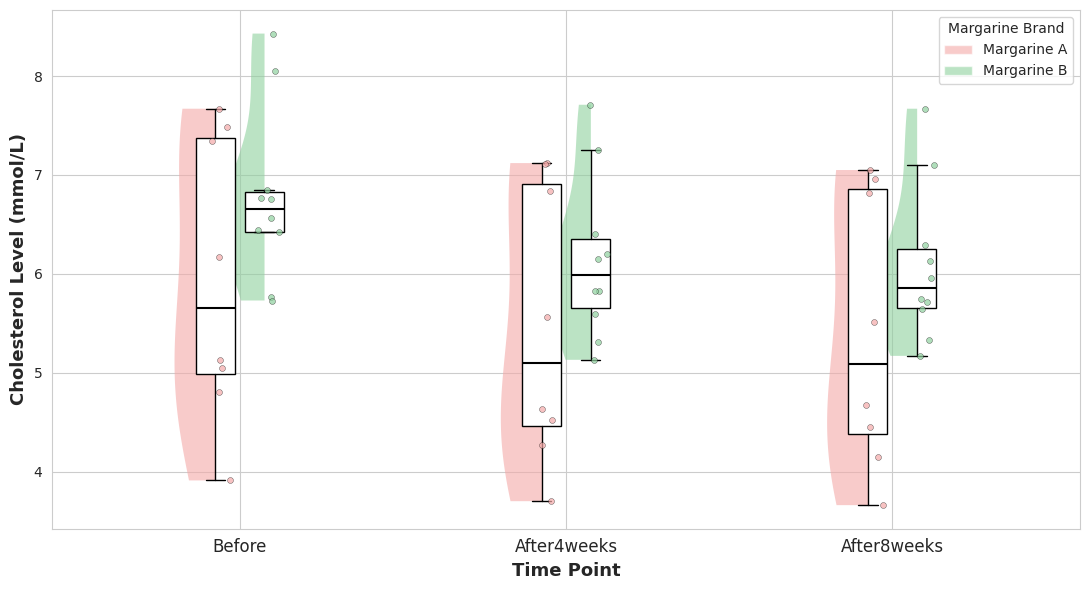

Raincloud plot saved as 'cholesterol_raincloud_plot.png'

3. HOMOGENEITY OF VARIANCES (LEVENE'S TEST)
------------------------------------------------------------------------------------------

Test for Equality of Variances
(Levene's)
--------------------------------------------------
F           df1          df2          p
--------------------------------------------------
2.667       5.000       48.000       0.033
--------------------------------------------------


4. BOX'S M TEST (HOMOGENEITY OF COVARIANCES)
------------------------------------------------------------------------------------------
Box's M Statistic: 5.107
Chi-square:        4.048
df:                6
p-value:           0.670


5. TWO-WAY MIXED ANOVA RESULTS
------------------------------------------------------------------------------------------
                       sum_sq    df         F  PR(>F)
C(Margarine)           2.7101   1.0  326.1957  0.0000
C(Time)                4.3195   2.0  259.9542  0.0000
C(ID)   

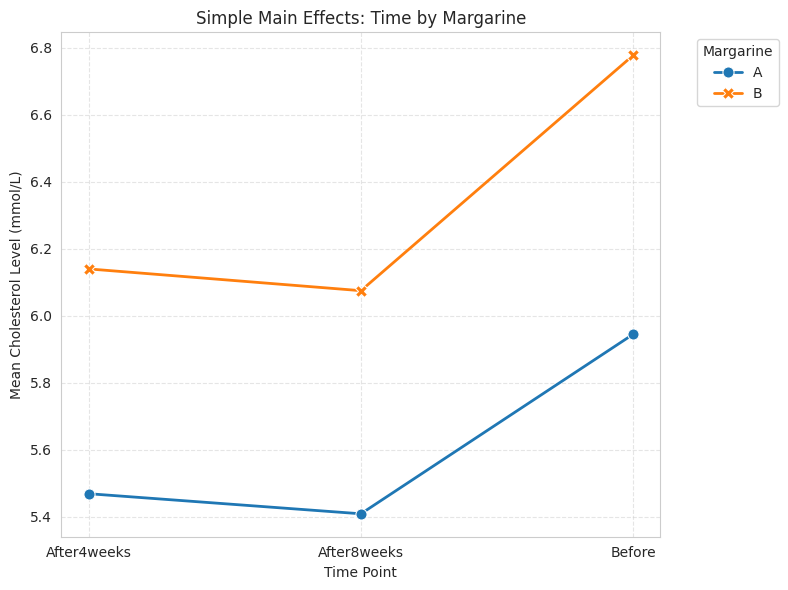

Plot A generated.

------------------------------------------------------------------------------------------

--- B. Simple Main Effects of MARGARINE (within Time) ---
Time            |  Sum of Squares |  df |  Mean Square |        F |        p
--------------------------------------------------------------------------------
Before          |           3.084 |   1 |        3.084 |    2.346 |    0.145
After4weeks     |           2.003 |   1 |        2.003 |    1.647 |    0.218
After8weeks     |           1.973 |   1 |        1.973 |    1.691 |    0.212


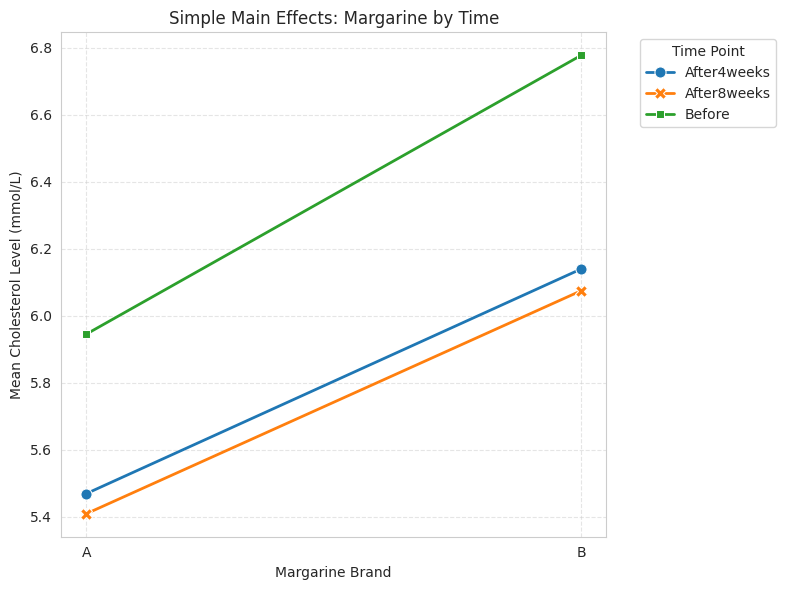

Plot B generated.

11. SUMMARY AND CONCLUSION

CONCLUSION REGARDING NULL HYPOTHESIS:
------------------------------------------------------------------------------------------
Null hypothesis: There is no significant difference in cholesterol levels
between the two brands of margarine over the three time points.

REJECT the null hypothesis. The data indicate a significant effect of margarine brand and/or an interaction with time.
- Significant main effect of margarine brand detected (p = 0.0000)
- Significant interaction effect detected (p = 0.0149)

Note: Significant main effect of time was found (p = 0.0000),
indicating both brands generally showed a decrease in cholesterol levels over time.

ANALYSIS COMPLETE


In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

print("="*90)
print("TWO-WAY MIXED MODEL ANOVA: EFFECT OF MARGARINE BRAND AND TIME ON CHOLESTEROL")
print("="*90)
print()

# -----------------------------
# DATASET
# -----------------------------
data = {
    'ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
    'Before': [6.42, 6.76, 6.56, 4.8, 8.43, 7.49, 8.05, 5.05, 5.77, 3.91, 6.77, 6.44, 6.17, 7.67, 7.34, 6.85, 5.13, 5.73],
    'After4weeks': [5.83, 6.2, 5.83, 4.27, 7.71, 7.12, 7.25, 4.63, 5.31, 3.7, 6.15, 5.59, 5.56, 7.11, 6.84, 6.4, 4.52, 5.13],
    'After8weeks': [5.75, 6.13, 5.71, 4.15, 7.67, 7.05, 7.1, 4.67, 5.33, 3.66, 5.96, 5.64, 5.51, 6.96, 6.82, 6.29, 4.45, 5.17],
    'Margarine': ['B', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'A', 'A', 'B', 'A', 'B']
}
df = pd.DataFrame(data)

# Prepare data for analysis - Reshape from wide to long format
df_long = pd.melt(df,
                  id_vars=['ID', 'Margarine'],
                  value_vars=['Before', 'After4weeks', 'After8weeks'],
                  var_name='Time',
                  value_name='Cholesterol')

df_long['ID'] = df_long['ID'].astype(str)
df_long['Margarine'] = df_long['Margarine'].astype(str)
time_order = ['Before', 'After4weeks', 'After8weeks']

# -----------------------------
# 1. DESCRIPTIVE STATISTICS
# -----------------------------
print("1. DESCRIPTIVE STATISTICS")
print("-" * 90)

# Standard Error of Skewness (SES)
def calc_se_skew(n):
    return np.sqrt((6*n*(n-1)) / ((n-2)*(n+1)*(n+3)))

# Standard Error of Kurtosis (SEK)
def calc_se_kurtosis(n):
    se_skew = calc_se_skew(n)
    return np.sqrt((4*(n**2 - 1) * se_skew**2) / ((n-3)*(n+5)))

for marg in ['A', 'B']:
    print(f"\nDescriptive Statistics filtered by Margarine {marg}")
    print("-" * 90)

    subset = df_long[df_long['Margarine'] == marg]
    table_data = {}

    # Group by Time
    groups = subset.groupby('Time')

    for time_point, group_df in groups:
        chol_data = group_df['Cholesterol']
        n = len(chol_data)

        mean_val = chol_data.mean()
        std_val = chol_data.std()

        w_stat, p_val = stats.shapiro(chol_data)

        skew_val = chol_data.skew()
        kurt_val = chol_data.kurtosis()

        se_skew = calc_se_skew(n)
        se_kurt = calc_se_kurtosis(n)

        table_data[time_point] = {
            'Valid': int(n),
            'Mean': round(mean_val, 3),
            'Std. Deviation': round(std_val, 3),
            'Skewness': round(skew_val, 3),
            'Std. Error of Skewness': round(se_skew, 3),
            'Kurtosis': round(kurt_val, 3),
            'Std. Error of Kurtosis': round(se_kurt, 3),
            'Shapiro-Wilk': round(w_stat, 3),
            'P-value of Shapiro-Wilk': round(p_val, 3)
        }

    stats_table = pd.DataFrame(table_data)
    print(stats_table.to_string())
    print("-" * 90)

# -----------------------------
# 2. RAINCLOUD PLOT
# -----------------------------
print("\n2. CREATING RAINCLOUD PLOT")
print("-" * 90)

plt.figure(figsize=(11, 6))

margarines = ["A", "B"]
time_points = time_order

# Colors
marg_colors = {
    "A": "#F4A9A8",     # soft red
    "B": "#8FD19E"      # soft green
}

# Spacing and offset
positions = np.arange(len(time_points))
offset = 0.15

for i, marg in enumerate(margarines):
    shift = (i - 0.5) * offset
    x_positions = positions + shift

    marg_data = [
        df_long[(df_long["Time"] == time) & (df_long["Margarine"] == marg)]["Cholesterol"].values
        for time in time_points
    ]

    # Half-violin (raincloud shape)
    violins = plt.violinplot(
        marg_data,
        positions=x_positions,
        widths=0.25,
        showmedians=False,
        showmeans=False,
        showextrema=False
    )

    # Make them "half" violins
    for body in violins["bodies"]:
        m = np.mean(body.get_paths()[0].vertices[:, 0])
        body.get_paths()[0].vertices[:, 0] = np.clip(
            body.get_paths()[0].vertices[:, 0],
            -np.inf, m
        )
        body.set_color(marg_colors[marg])
        body.set_alpha(0.6)
        body.set_edgecolor('none')

    # Boxplot overlay
    plt.boxplot(
        marg_data,
        positions=x_positions,
        widths=0.12,
        patch_artist=True,
        showfliers=False,
        boxprops=dict(facecolor="white", edgecolor="black"),
        medianprops=dict(color="black", linewidth=1.5),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
        zorder=3
    )

    # Jittered points
    for j, subset in enumerate(marg_data):
        jitter = np.random.normal(x_positions[j] + 0.02, 0.015, size=len(subset))
        plt.scatter(
            jitter,
            subset,
            color=marg_colors[marg],
            alpha=0.7,
            s=18,
            edgecolor="black",
            linewidth=0.3,
            zorder=5
        )

# Labels and legend
plt.xticks(positions, time_points, fontsize=12)
plt.xlabel("Time Point", fontsize=13, fontweight="bold")
plt.ylabel("Cholesterol Level (mmol/L)", fontsize=13, fontweight="bold")

from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=marg_colors[m], label=f'Margarine {m}', alpha=0.6) for m in margarines
]
plt.legend(handles=legend_elements, title="Margarine Brand")

plt.tight_layout()
plt.savefig("cholesterol_raincloud_plot.png", dpi=300)
plt.show()

print("Raincloud plot saved as 'cholesterol_raincloud_plot.png'\n")

# -----------------------------
# 3. HOMOGENEITY OF VARIANCES (LEVENE'S TEST)
# -----------------------------
print("3. HOMOGENEITY OF VARIANCES (LEVENE'S TEST)")
print("-" * 90)

grouped_data = df_long.groupby(['Margarine', 'Time'])['Cholesterol']
samples = [group for name, group in grouped_data]

stat, p_val = stats.levene(*samples)

k = len(samples)
N = len(df_long)
df1 = k - 1
df2 = N - k

print("\nTest for Equality of Variances")
print("(Levene's)")
print("-" * 50)
print("F           df1          df2          p")
print("-" * 50)
print(f"{stat:.3f}       {df1:.3f}       {df2:.3f}       {p_val:.3f}")
print("-" * 50)
print("\n")

# -----------------------------
# 4. BOX'S M TEST
# -----------------------------
print("4. BOX'S M TEST (HOMOGENEITY OF COVARIANCES)")
print("-" * 90)

def calculate_box_m(df, dvs, group_col):
    groups = df[group_col].unique()
    k = len(dvs)
    g = len(groups)
    n_total = len(df)

    pooled_cov = np.zeros((k, k))
    term2 = 0

    for group in groups:
        sub_df = df[df[group_col] == group][dvs]
        ni = len(sub_df)
        cov_i = sub_df.cov()
        pooled_cov += (ni - 1) * cov_i
        term2 += (ni - 1) * np.log(np.linalg.det(cov_i))

    pooled_cov /= (n_total - g)
    term1 = (n_total - g) * np.log(np.linalg.det(pooled_cov))

    box_m = term1 - term2

    c = ((2*k**2 + 3*k - 1) / (6*(k+1)*(g-1))) * (sum([1/(len(df[df[group_col]==gr])-1) for gr in groups]) - 1/(n_total-g))
    chi_sq = box_m * (1 - c)
    df_chi = (k * (k + 1) * (g - 1)) / 2

    p_val = 1 - stats.chi2.cdf(chi_sq, df_chi)

    return box_m, chi_sq, int(df_chi), p_val

dvs = ['Before', 'After4weeks', 'After8weeks']
M, chi, df_val, p = calculate_box_m(df, dvs, 'Margarine')

print(f"Box's M Statistic: {M:.3f}")
print(f"Chi-square:        {chi:.3f}")
print(f"df:                {df_val}")
print(f"p-value:           {p:.3f}")
print("\n")

# -----------------------------
# 5. TWO-WAY MIXED ANOVA
# -----------------------------
print("5. TWO-WAY MIXED ANOVA RESULTS")
print("-" * 90)

model = ols('Cholesterol ~ C(Margarine) + C(Time) + C(Margarine):C(Time) + C(ID)',
            data=df_long).fit()
anova_table = anova_lm(model, typ=2)
print(anova_table.round(4), "\n")

# Extract p-values
p_marg = anova_table.loc['C(Margarine)', 'PR(>F)']
p_time = anova_table.loc['C(Time)', 'PR(>F)']
p_int = anova_table.loc['C(Margarine):C(Time)', 'PR(>F)']

# -----------------------------
# 6. EFFECT SIZES (η²)
# -----------------------------
print("6. EFFECT SIZES (η²)")
print("-" * 90)

ss_total = anova_table['sum_sq'].sum()

eta_marg = anova_table.loc['C(Margarine)', 'sum_sq'] / ss_total
eta_time = anova_table.loc['C(Time)', 'sum_sq'] / ss_total
eta_int  = anova_table.loc['C(Margarine):C(Time)', 'sum_sq'] / ss_total

print(f"Margarine η² = {eta_marg:.4f}")
print(f"Time η²      = {eta_time:.4f}")
print(f"Interaction η² = {eta_int:.4f}\n")

# -----------------------------
# 7. POST-HOC TEST FOR 6 GROUPS
# -----------------------------
print("7. POST-HOC TESTS (Tukey HSD for 6 groups)")
print("-" * 90)

# Create a combined interaction variable
df_long["Group6"] = df_long["Margarine"] + " - " + df_long["Time"]

def tukey_spss_6groups(df, factor, dv):
    print(f"\nPost-hoc for {factor} (6 groups):\n")

    tukey = pairwise_tukeyhsd(endog=df[dv],
                              groups=df[factor],
                              alpha=0.05)

    raw = pd.DataFrame(tukey._results_table.data[1:],
                       columns=tukey._results_table.data[0])

    raw["meandiff"] = raw["meandiff"].astype(float)
    raw["lower"] = raw["lower"].astype(float)
    raw["upper"] = raw["upper"].astype(float)
    raw["p-adj"] = raw["p-adj"].astype(float)

    # Compute SE using CI width
    q_value = 3.314
    raw["SE"] = (raw["upper"] - raw["lower"]) / (2 * q_value)

    # Compute t statistic
    raw["t"] = raw["meandiff"] / raw["SE"]

    final = raw.rename(columns={
        "group1": "Group 1",
        "group2": "Group 2",
        "meandiff": "Mean Difference",
        "lower": "Lower",
        "upper": "Upper",
        "p-adj": "p_tukey"
    })[[
        "Group 1", "Group 2",
        "Mean Difference", "Lower", "Upper",
        "SE", "t", "p_tukey"
    ]]

    print(final.to_string(index=False))

tukey_spss_6groups(df_long, "Group6", "Cholesterol")
print("\n")

# -----------------------------
# 8. DESCRIPTIVES
# -----------------------------
print("8. DESCRIPTIVES")
print("-" * 90)

desc_table = df_long.groupby(['Margarine', 'Time'])['Cholesterol'].agg(['count', 'mean', 'std', 'sem']).reset_index()
desc_table['cv'] = desc_table['std'] / desc_table['mean']

desc_table.columns = ['Margarine', 'Time', 'N', 'Mean', 'SD', 'SE', 'Coefficient of variation']

desc_table = desc_table.round({
    'Mean': 2,
    'SD': 2,
    'SE': 2,
    'Coefficient of variation': 2
})

print(desc_table.to_string(index=False))
print("\n")

# -----------------------------
# 9. TWO-WAY ANOVA TABLE (Type III)
# -----------------------------
print("9. TWO-WAY ANOVA TABLE. Type III Sum of Squares")
print("-" * 90)

model = ols('Cholesterol ~ C(Margarine) + C(Time) + C(Margarine):C(Time) + C(ID)',
            data=df_long).fit()

aov_table = anova_lm(model, typ=3)

# Calculate Mean Square
aov_table['mean_sq'] = aov_table['sum_sq'] / aov_table['df']

# Calculate Partial Eta Squared
aov_table['eta_sq'] = aov_table['sum_sq'] / (aov_table['sum_sq'] + aov_table['sum_sq']['Residual'])

# Rename columns
aov_table.columns = ['Sum of Squares', 'df', 'F', 'p', 'Mean Square', 'Partial Eta Sq']

# Reorder columns
aov_table = aov_table[['Sum of Squares', 'df', 'Mean Square', 'F', 'p', 'Partial Eta Sq']]

pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(aov_table)
print("-" * 90)

# -----------------------------
# 10. SIMPLE MAIN EFFECTS ANALYSIS
# -----------------------------
print("\n" + "="*90)
print("10. SIMPLE MAIN EFFECTS ANALYSIS (Two Directions)")
print("="*90)

# ---------------------------------------------------------
# A. Simple Main Effects of TIME within each MARGARINE
# ---------------------------------------------------------
print("\n--- A. Simple Main Effects of TIME (within Margarine) ---")
print(f"{'Margarine':<12} | {'Sum of Squares':>15} | {'df':>3} | {'Mean Square':>12} | {'F':>8} | {'p':>8}")
print("-" * 80)

for marg in ['A', 'B']:
    subset = df_long[df_long['Margarine'] == marg]

    model = ols('Cholesterol ~ C(Time)', data=subset).fit()
    aov = anova_lm(model, typ=1)

    ss = aov.loc['C(Time)', 'sum_sq']
    df_val = int(aov.loc['C(Time)', 'df'])
    ms = aov.loc['C(Time)', 'mean_sq']
    f_val = aov.loc['C(Time)', 'F']
    p_val = aov.loc['C(Time)', 'PR(>F)']

    print(f"{'Margarine ' + marg:<12} | {ss:>15.3f} | {df_val:>3} | {ms:>12.3f} | {f_val:>8.3f} | {p_val:>8.3f}")

# Plot A: Interaction Plot (Time on X-axis, lines for Margarine)
plt.figure(figsize=(8, 6))
means_a = df_long.groupby(['Time', 'Margarine'])['Cholesterol'].mean().reset_index()

sns.lineplot(data=means_a, x='Time', y='Cholesterol', hue='Margarine',
             style='Margarine', markers=True, dashes=False, linewidth=2, markersize=8)

plt.title('Simple Main Effects: Time by Margarine')
plt.ylabel('Mean Cholesterol Level (mmol/L)')
plt.xlabel('Time Point')
plt.legend(title='Margarine', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('simple_effects_time.png', dpi=300)
plt.show()
print("Plot A generated.\n")

# ---------------------------------------------------------
# B. Simple Main Effects of MARGARINE within each TIME
# ---------------------------------------------------------
print("-" * 90)
print("\n--- B. Simple Main Effects of MARGARINE (within Time) ---")
print(f"{'Time':<15} | {'Sum of Squares':>15} | {'df':>3} | {'Mean Square':>12} | {'F':>8} | {'p':>8}")
print("-" * 80)

for time in time_order:
    subset = df_long[df_long['Time'] == time]

    model = ols('Cholesterol ~ C(Margarine)', data=subset).fit()
    aov = anova_lm(model, typ=1)

    ss = aov.loc['C(Margarine)', 'sum_sq']
    df_val = int(aov.loc['C(Margarine)', 'df'])
    ms = aov.loc['C(Margarine)', 'mean_sq']
    f_val = aov.loc['C(Margarine)', 'F']
    p_val = aov.loc['C(Margarine)', 'PR(>F)']

    print(f"{time:<15} | {ss:>15.3f} | {df_val:>3} | {ms:>12.3f} | {f_val:>8.3f} | {p_val:>8.3f}")

# Plot B: Interaction Plot (Margarine on X-axis, lines for Time)
plt.figure(figsize=(8, 6))
means_b = df_long.groupby(['Margarine', 'Time'])['Cholesterol'].mean().reset_index()

sns.lineplot(data=means_b, x='Margarine', y='Cholesterol', hue='Time',
             style='Time', markers=True, dashes=False, linewidth=2, markersize=8)

plt.title('Simple Main Effects: Margarine by Time')
plt.ylabel('Mean Cholesterol Level (mmol/L)')
plt.xlabel('Margarine Brand')
plt.legend(title='Time Point', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('simple_effects_margarine.png', dpi=300)
plt.show()
print("Plot B generated.")
print("="*90)

# -----------------------------
# 11. CONCLUSION
# -----------------------------
print("\n11. SUMMARY AND CONCLUSION")
print("="*90)

print("\nCONCLUSION REGARDING NULL HYPOTHESIS:")
print("-"*90)
print("Null hypothesis: There is no significant difference in cholesterol levels")
print("between the two brands of margarine over the three time points.")
print()

if p_marg < 0.05 or p_int < 0.05:
    print("REJECT the null hypothesis. The data indicate a significant effect of margarine brand and/or an interaction with time.")
    if p_marg < 0.05:
        print(f"- Significant main effect of margarine brand detected (p = {p_marg:.4f})")
    if p_int < 0.05:
        print(f"- Significant interaction effect detected (p = {p_int:.4f})")
else:
    print("FAIL TO REJECT the null hypothesis.")
    print(f"Margarine main effect: p = {p_marg:.4f}")
    print(f"Interaction effect: p = {p_int:.4f}")
    print("There is insufficient evidence to conclude that cholesterol levels differ")
    print("between margarine brands across the time points.")

if p_time < 0.05:
    print(f"\nNote: Significant main effect of time was found (p = {p_time:.4f}),")
    print("indicating both brands generally showed a decrease in cholesterol levels over time.")

print("\n" + "="*90)
print("ANALYSIS COMPLETE")
print("="*90)